# **Evaluation Techniques for Regression Models**
We have multiple Evaluation Techniques for regression models. But first we will create a linear regression model to train our data. After that we will do some evaluation of our model We will implemetn our evaluation techniques from scratch.

### **Create Data**
First let's create a custom dataset. of a house saling company. We are interseted in predicting the price of of the house based on several features oof taht house. 

In [34]:
import numpy as np
import pandas as pd

In [93]:
# Sample data
data = {
    'bedrooms': [3, 4, 2, 3, 5, 3, 4, 2, 3, 4],
    'bathrooms': [2, 3, 1, 2, 4, 2, 3, 1, 2, 3],
    'size (sqft)': [1500, 2000, 900, 1600, 3000, 1400, 2200, 1100, 1300, 1800],
    'age (years)': [10, 5, 20, 8, 2, 15, 7, 12, 10, 6],
    'distance to city center (miles)': [5, 10, 3, 7, 15, 4, 6, 2, 5, 8],
    'price (1000s $)': [400, 500, 300, 420, 600, 380, 550, 350, 390, 480]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['bedrooms', 'bathrooms', 'size (sqft)', 'age (years)', 'distance to city center (miles)']]
y = df['price (1000s $)']

In [94]:
X

,bedrooms,bathrooms,size (sqft),age (years),distance to city center (miles)
0,3,2,1500,10,5
1,4,3,2000,5,10
2,2,1,900,20,3
3,3,2,1600,8,7
4,5,4,3000,2,15
5,3,2,1400,15,4
6,4,3,2200,7,6
7,2,1,1100,12,2
8,3,2,1300,10,5
9,4,3,1800,6,8


In [95]:
y

0    400
1    500
2    300
3    420
4    600
5    380
6    550
7    350
8    390
9    480
Name: price (1000s $), dtype: int64

### **Train a Simple Regression Model**
We'll start by training a simple linear regression model using scikit-learn.


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [97]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train, y_train)

LinearRegression()

In [99]:
# Make prediction
y_pred = LinearRegressor.predict(X_test)

# **Evaluation Techniques**
Now that we have trained our model, we will do our model evaluation by applying all te evaluation techniques one by one while demonstrating and coding them from scratch for better understanding.


## **1. Mean Absolute Error(MAE)**
- MAE calculates the absolute difference between actual and predicted values.
- MAE gives an idea of how wrong the model's predictions are on average.
- A lower MAE indicates better performance.
- Use MAE when you want an easily interpretable metric that shows the average error in the same units as the target variable.

We can calculate the MAE by using the following formula:

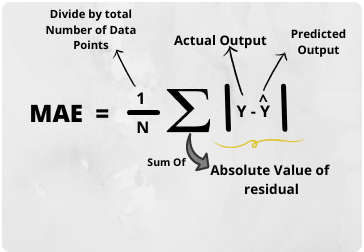

Let's define a function for MAE Calculation

In [70]:
def mean_absolute_error(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [71]:
MAE = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {MAE}")

Mean Absolute Error: 9.146461714632949


The mean absolute error shows that our models is preforming well as the mean difference between the predicted and actual value is 9.14 where our values in the target column lies from 300 to 600.

We can cross check whether we have calculted correct value or not by using the sklearn to calculate the MAR.

In [72]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 9.146461714632949


As the MAE calcualted by the sklearn is the same as we calculated by defining or own formula, so have calculated correctly.

**Disadvantage of MAE**
The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.

Now to overcome the disadvantage of MAE next metric came as MSE.

## **2. Mean Squared Error(MSE)**
-  Mean squared error finds the squared difference between actual and predicted value.
- It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

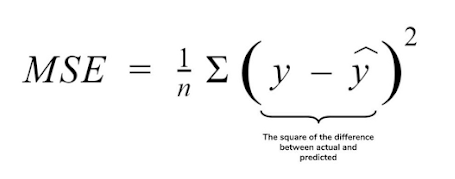

- The graph of MSE is differentiable, so you can easily use it as a loss function.
- MSE penalizes larger errors more than smaller ones.
- A lower MSE indicates better performance.

In [73]:
# Define custom MSE Function
def MSE(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [74]:
mse = MSE(y_test, y_pred)
print(f"The Mean Square Error is {mse}")

The Mean Square Error is 156.6303016178748


sklearn also proides function for MSE Calculation.

In [75]:
# Calculate MSE from sklearn
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 156.6303016178748


## **3. Root Mean Squared Error(RMSE)**
- As the name tells it is the square root of Mean squared Error.
- It provides error in the same units as the target variable.
- RMSE gives a sense of the typical size of the error.
- A lower RMSE indicates better performance.

**Advantage:**

The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

**Disadvantages:**

It is not that robust to outliers as compared to MAE.

Here is the formula for RMSE calculation:

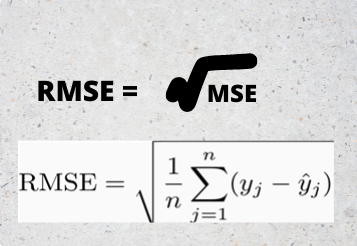


To define the custom function of RMSE. We siply need to define a function that calculates the squrare root of the MSE that we calculated previously. As we have already calcualted the MSE so we will not calculate it again.

In [76]:
# Define RMSE
def RMSE(y, y_pred):
    return np.sqrt(MSE(y, y_pred))

In [77]:
rmse = RMSE(y_test, y_pred)
print( "Root Mean Squared Error is ", rmse)

Root Mean Squared Error is  12.515202819685936


If we want to calculate the RMSE in sklearn we can simply take the square root of the MSE.

In [78]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 12.515202819685936


## **4. Root Mean Squared Log Error(RMSLE)**
- Taking the log of the RMSE metric slows down the scale of error. 
- The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

- To control this situation of RMSE we take the log of calculated RMSE error and resultant we get as RMSLE.

To creste s function to calculate the RMSLE we can simply take the log of the RMSE Calculated before.

In [79]:
# Define RMSLE function
def RMSLE(y, y_pred):
    return np.log(RMSE(y, y_pred))

In [80]:
rmsle = RMSLE(y_test, y_pred)
print( "Root Mean Squared Log Error is ", rmsle)

Root Mean Squared Log Error is  2.5269441308799414


## **5. R Squared(R2)**
- R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.
- R2 score is independent of context.
- R-squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
- Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.

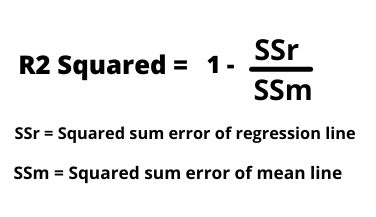

#### **Interpretting the R2 Score:**
**R2 = 0** : If R2 score is zero then that means SSr = SSm. Which concludes that the Regression line and the mean line overlap with each other which is the worst performance.

**R2 = 1:** If R2 is 1 then we can infer that the squared error of regression term is zero , meaning that it is making no mistakes and is prefent. Which is not possible in real world problems.

**Normal Case:** The normal case is when the R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data.

In [81]:
def R2(y, y_pred):
    SSr = np.sum((y - y_pred) ** 2)  # Squared Sum Eror of Regression Line
    SSm = np.sum((y - np.mean(y)) ** 2)  # Squared sum error of Mean Line
    return 1 - (SSr / SSm)

In [82]:
r2 = R2(y_test, y_pred)
print("R-Squared", r2)

R-Squared 0.9482213878949174


The R2 Score suggests that our model is being trained well as score 0f 0.94 is very close to 1 (being prefect model).

In [83]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9482213878949174


**Disadvantage of R2**

The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

When we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect.

## **6. Adjusted R Squared**
- To control the problem of R2 Adjusted R Squared came into existence.
- Adjusted R² is always lower than R² and can be negative.
- A higher Adjusted R² indicates a better model, accounting for the number of predictors.
- Use Adjusted R² when you have multiple predictors and want to penalize the addition of irrelevant predictors.

Here is the formula to calcualte the adjusted R2:

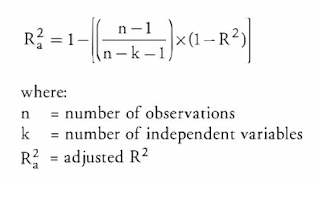

Now as K increases by adding some features so the denominator will decrease, n-1 will remain constant. R2 score will remain constant or will increase slightly so the complete answer will increase and when we subtract this from one then the resultant score will decrease. so this is the case when we add an irrelevant feature in the dataset.

In [84]:
def Adjusted_R2(y, y_pred, n , k):
    r2 = R2(y, y_pred)
    return 1 - ((n - 1) / (n - k - 1) * (1 - r2))

In [85]:
# number of observations
n = len(y_test)
# number of independent variables
k = X_test.shape[1]
adjusted_r2 = Adjusted_R2(y_test, y_pred, n, k)
print("Adjusted R-Squared: ", adjusted_r2)

Adjusted R-Squared:  1.0129446530262707


## **7. Mean Absolute Percentage Error**
MAPE is a measure of prediction accuracy of a forecasting method. It expresses the accuracy as a percentage, which is easy to understand.

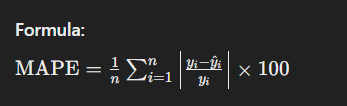

In [86]:
def MAPE(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y)) * 100

In [87]:
mape = MAPE(y_test, y_pred)
print("Mean Absolute Percenatge Error: ", mape)

Mean Absolute Percenatge Error:  1.8463300768482682


## **8. Median Absolute Error**
- Median Absolute Error is a robust measure of the absolute differences between the target and predicted values. It is less sensitive to outliers compared to MAE.
- The Median Absolute Error is a metric that can be used to quantify a regression models performance. 
- This measure is slightly more difficult to interpret for a non-technical audience. 
- However, the main benefit of using this quantity is its strong resilience to outliers.
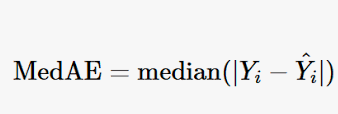

In [88]:
def MedAE(y, y_pred):
    return np.median(np.abs(y, y_pred))

In [89]:
med_ae = MedAE(y_test, y_pred)
print("Median Absolute Error: ", med_ae)

Median Absolute Error:  445.0


## **9. D2 Absolute Error**
The D2 Absolute Error is a measure of how well the model explains the absolute deviations in the data. It is a variant of the coefficient of determination (R²) that uses absolute errors instead of squared errors. A higher D2 value indicates better model performance.

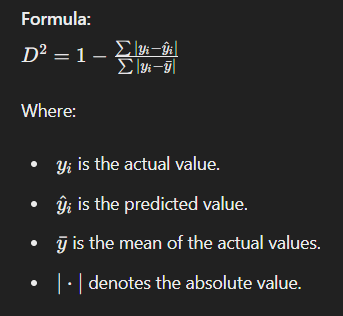

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A model that always uses the empirical median of y_true as constant prediction, disregarding the input features, gets a score of 0.0.

In [106]:
def D2_error(y, y_pred):
    return 1 - ((np.sum(np.abs(y - y_pred))) / (np.sum(np.abs(y - np.mean(y)))))

In [107]:
d2_error = D2_error(y_test, y_pred)
print("D2 Absolute Error: ", d2_error)

D2 Absolute Error:  0.8337006960975828


A value of 0.83 suggests that our model preformance is satisfctory.
We can also use sklearn to check whether we have calcualted correct value or not.

In [101]:
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(y_test, y_pred)

0.8337006960975828

## **10. Explained Variance Score**
The Explained Variance Score measures the proportion of the variance in the target variable that is predictable from the features. It ranges from 0 to 1, where 1 indicates perfect prediction and 0 indicates that the model does not explain any of the variance.

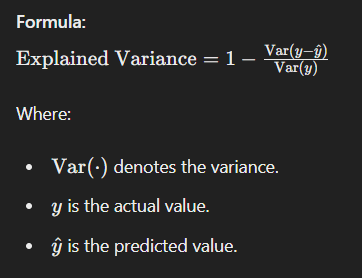

Best possible score is 1.0, lower values are worse.

In the particular case when y_true is constant, the explained variance score is not finite: it is either NaN (perfect predictions) or -Inf (imperfect predictions). 

To prevent such non-finite numbers to pollute higher-level experiments such as a grid search cross-validation, by default these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect predictions) respectively. If force_finite is set to False, this score falls back on the original 
 definition.

In [111]:
def explained_variance(y, y_pred):
    numerator = np.var(y - y_pred)
    denominator = np.var(y)
    return 1 - (numerator / denominator)

In [112]:
exp_var = explained_variance(y_test, y_pred)
print("Explained Variance Score: ", exp_var)

Explained Variance Score:  0.9723445415215715


0.97 is a good sore for our model. We can also take help from sklearn to calculate the explained variance score.

In [102]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9723445415215715

## **11. Maximum Error**
- The max_error metric calculates the maximum residual error.
- The Maximum Error is the largest absolute difference between the actual and predicted values. It provides a worst-case error measure and is useful when the maximum deviation is critical.

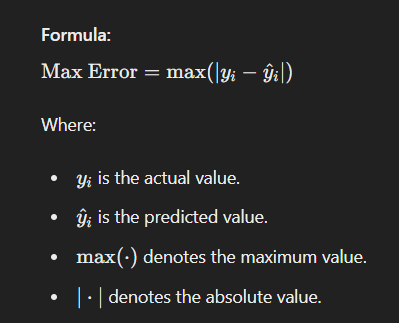

In [116]:
def maximum_error(y, y_pred):
    return np.max(np.abs(y - y_pred))

In [117]:
max_error = maximum_error(y_test,y_pred)
print("Maximum Error: ", max_error)

Maximum Error:  17.688858317497306


We can alsp take help from sklearn to calculate the maximum error. The value tll s that the maximum residual in our test data is 17 which a good values as compareg to the values in our test data.

In [118]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

17.688858317497306